# Task 3 - Modeling






 # Importing Different Packages

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

---

# Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [ ]:
#path = "/content/drive/MyDrive/Forage - Cognizant AI Program/Task 3/Resources/"
path='/content/sales.csv'
sales_df = pd.read_csv(path)
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
stock_df = pd.read_csv('/content/sensor_stock_levels (1).csv')
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df = pd.read_csv('/content/sensor_storage_temperature.csv')
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

## Performing different methods and to get more info about structure od data

In [ ]:
sales_df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [ ]:
stock_df.isnull().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [ ]:
temp_df.isnull().sum()

id             0
timestamp      0
temperature    0
dtype: int64

## Performing Summary Statistics to get info about numerical data

In [ ]:
sales_df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:
stock_df.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [ ]:
temp_df.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


In [ ]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [ ]:
#sales_df['timestamp'] = sales_df['timestamp'].astype('datetime64')

# Data Cleaning

### Converting datatype from numerical to date type of specific columns

In [ ]:
sales_df['timestamp']= pd.to_datetime(sales_df['timestamp'])

In [ ]:
stock_df['timestamp'] =  stock_df['timestamp'].astype('datetime64')

In [ ]:
temp_df['timestamp'] = temp_df['timestamp'].astype('datetime64')

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


### Resetting time in minutes and seconds from 09:11:45 to 09:00:00

In [ ]:
from datetime import datetime

In [ ]:
stock_df['timestamp'] = stock_df['timestamp'].apply(lambda x: x.replace(minute=0, second=0))

In [ ]:
sales_df['timestamp'] = sales_df['timestamp'].apply(lambda x: x.replace(minute=0, second=0))

In [ ]:
#sales_df.set_index('timestamp',inplace=True)

In [ ]:
#hourly_data= sales_df.resample('H').mean

In [ ]:
#print(hourly_data)

In [ ]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
#stock_df.set_index('timestamp',inplace=True)

In [ ]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
temp_df['timestamp'] = temp_df['timestamp'].apply(lambda x: x.replace(minute=0, second=0))

In [ ]:
#temp_df.set_index('timestamp',inplace=True)

In [ ]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


### Creating a new dataframe in which we group 2 features and based on their sum of products we produce summed quantity for respective 2 features.  

In [ ]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [ ]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [ ]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


## We start to merge these new dataframes after a little data manipulation

In [ ]:
merge_df = stock_agg.merge(sales_agg, on= ['timestamp','product_id'],how='left')
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [ ]:
merge_df=merge_df.merge(temp_agg,on=['timestamp'],how='left')
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [ ]:
merge_df.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

We need to remove null values in column quantity

In [ ]:
merge_df.dropna()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850
8,2022-03-01 09:00:00,0ddc2379-adba-4fb0-aa97-19fcafc738a1,0.35,3.0,-0.028850
13,2022-03-01 09:00:00,146d5e4d-992a-4db7-904d-b8af359b80a7,0.48,1.0,-0.028850
14,2022-03-01 09:00:00,14736243-d346-438f-9535-d80fcb9f3882,0.67,6.0,-0.028850
...,...,...,...,...,...
10837,2022-03-07 19:00:00,e8e2570a-283e-41f4-9938-589217280f22,0.59,1.0,-0.165077
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077


In [ ]:
merge_df.isnull().sum()

timestamp                 0
product_id                0
estimated_stock_pct       0
quantity               7778
temperature               0
dtype: int64

we remove null values in quantity by filling them with 0 number

In [ ]:
merge_df['quantity'] = merge_df['quantity'].fillna(0)

In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


we further create more features in order to

In [ ]:
product_categories = sales_df[['product_id','category']]
product_categories.drop_duplicates()
#product_categories.duplicated().sum()
product_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  7829 non-null   object
 1   category    7829 non-null   object
dtypes: object(2)
memory usage: 122.5+ KB


In [ ]:
product_categories = sales_df[['product_id','category']]
product_categories = product_categories.drop_duplicates()
#product_categories.duplicated().sum()
product_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 7579
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  300 non-null    object
 1   category    300 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB


In [ ]:
product_price = sales_df[['product_id','unit_price']]

product_price=product_price.drop_duplicates()
product_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 7579
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  300 non-null    object 
 1   unit_price  300 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [ ]:
merge_df = merge_df.merge(product_categories, on='product_id',how='left')

In [ ]:
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [ ]:
merge_df = merge_df.merge(product_price, on='product_id',how='left')

In [ ]:
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [ ]:
merge_df.isnull().sum()

timestamp              0
product_id             0
estimated_stock_pct    0
quantity               0
temperature            0
category               0
unit_price             0
dtype: int64

# **Feature** **engineering**

---



In [ ]:
merge_df['timestamp_day_of_month'] = merge_df['timestamp'].dt.day
merge_df['timestamp_day_of_week'] = merge_df['timestamp'].dt.dayofweek
merge_df['timestamp_hour'] = merge_df['timestamp'].dt.hour
merge_df['timestamp_day_of_month'] = merge_df['timestamp'].dt.day
merge_df.drop(columns=['timestamp'], inplace =True)
merge_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


making category column in category into numerical form.

In [ ]:
merge_df= pd.get_dummies(merge_df,columns=['category'])
merge_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   timestamp_day_of_month          10845 non-null  int64  
 6   timestamp_day_of_week           10845 non-null  int64  
 7   timestamp_hour                  10845 non-null  int64  
 8   category_baby products          10845 non-null  uint8  
 9   category_baked goods            10845 non-null  uint8  
 10  category_baking                 10845 non-null  uint8  
 11  category_beverages              10845 non-null  uint8  
 12  category_canned foods           

In [ ]:
merge_df.isnull().sum()

product_id                        0
estimated_stock_pct               0
quantity                          0
temperature                       0
unit_price                        0
timestamp_day_of_month            0
timestamp_day_of_week             0
timestamp_hour                    0
category_baby products            0
category_baked goods              0
category_baking                   0
category_beverages                0
category_canned foods             0
category_cheese                   0
category_cleaning products        0
category_condiments and sauces    0
category_dairy                    0
category_frozen                   0
category_fruit                    0
category_kitchen                  0
category_meat                     0
category_medicine                 0
category_packaged foods           0
category_personal care            0
category_pets                     0
category_refrigerated items       0
category_seafood                  0
category_snacks             

# we only got one other categorical column which is product id we can remove it.

In [ ]:
merge_df.drop(columns=['product_id'],inplace = True)

In [ ]:
merge_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = merge_df.drop(columns=['estimated_stock_pct'])
y= merge_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


# Modelling
# Random Forest Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

In [ ]:
K = 10
split = 0.75

In [ ]:
accuracy = []
for fold in range(0,K):
  model=RandomForestRegressor()
  scaler=StandardScaler()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  trained_model = model.fit(X_train,y_train)

  y_pred= trained_model.predict(X_test)
  mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE : {(sum(accuracy)/ len(accuracy)):.2f}")

Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.236
Fold 4: MAE = 0.237
Fold 5: MAE = 0.235
Fold 6: MAE = 0.236
Fold 7: MAE = 0.236
Fold 8: MAE = 0.236
Fold 9: MAE = 0.237
Fold 10: MAE = 0.236
Average MAE : 0.24


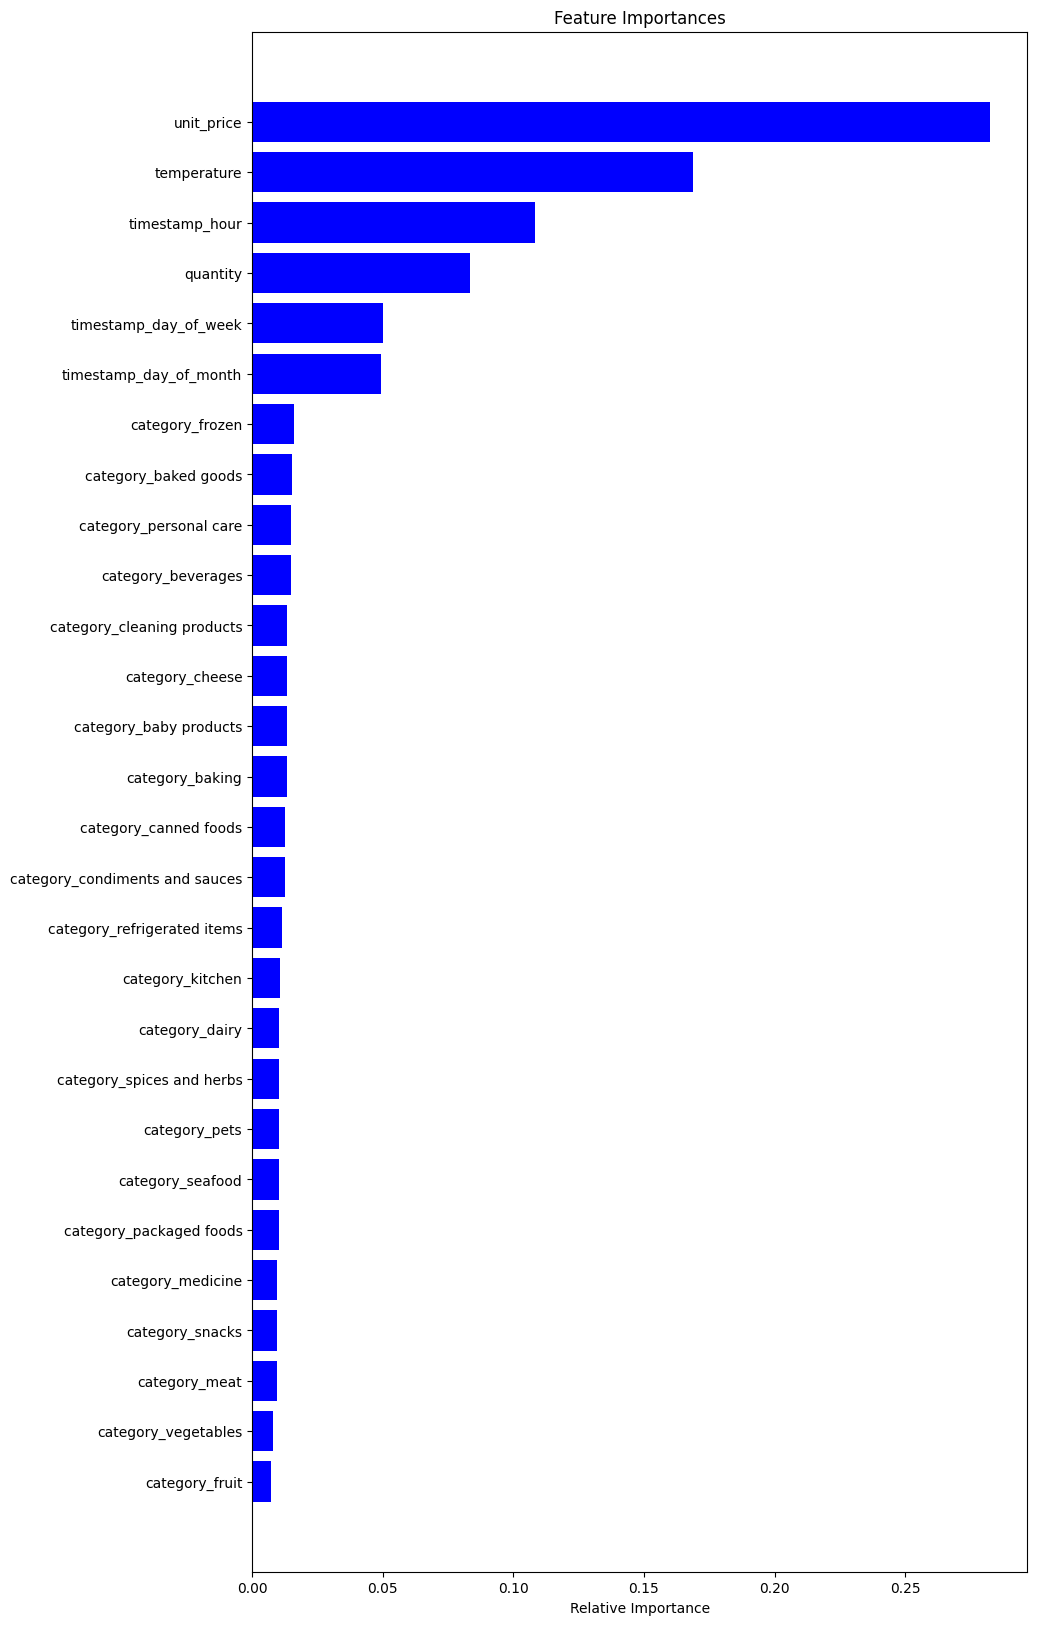

In [ ]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

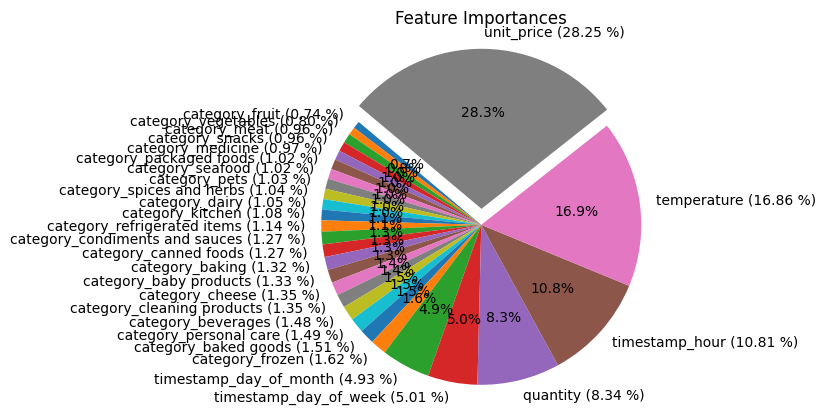

In [ ]:
features = [i.split("__")[0] for i in X.columns]

# Get feature importances from the model
importances = model.feature_importances_

# Normalize importances to percentages
normalized_importances = importances / np.sum(importances)

# Create a pie chart
fig, ax = plt.subplots()
plt.title('Feature Importances')

# Labels for the pie chart segments
labels = [f"{features[i]} ({normalized_importances[i]*100:.2f} %)" for i in indices]

# Explode the most important features for emphasis
explode = [0.1 if i == np.argmax(normalized_importances) else 0 for i in indices]

plt.pie(normalized_importances[indices], labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# XGBOOST MODEL

In [ ]:
numfolds = 10
kf = KFold(n_splits=numfolds, shuffle=True, random_state=42)


In [ ]:
accuracy = []

params = {
    'objective': 'reg:squarederror',  # Regression task
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}


for fold,(train_index,test_index) in enumerate (kf.split(X),0):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test= y.iloc[train_index], y.iloc[test_index]
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  model=xgb.XGBRegressor()
  model.fit(X_train,y_train)

  y_pred= model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE : {(sum(accuracy)/ len(accuracy)):.2f}")



Fold 1: MAE = 0.235
Fold 2: MAE = 0.237
Fold 3: MAE = 0.237
Fold 4: MAE = 0.237
Fold 5: MAE = 0.243
Fold 6: MAE = 0.234
Fold 7: MAE = 0.239
Fold 8: MAE = 0.233
Fold 9: MAE = 0.235
Fold 10: MAE = 0.228
Average MAE : 0.24


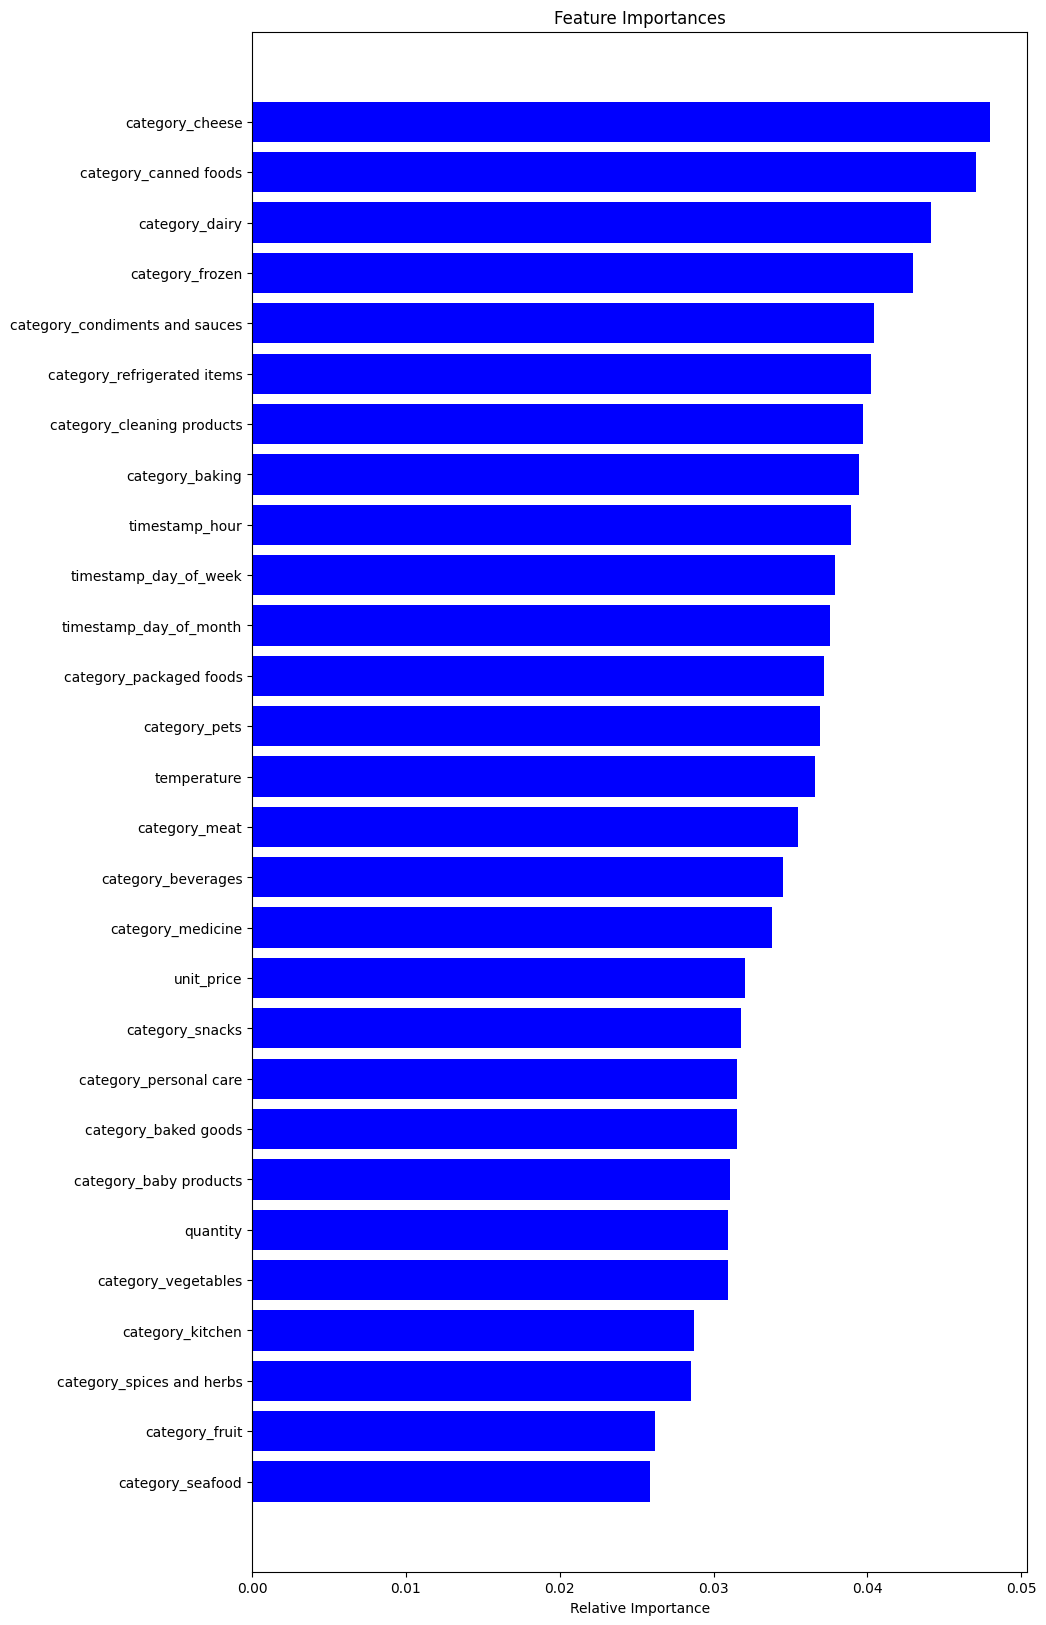

In [ ]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

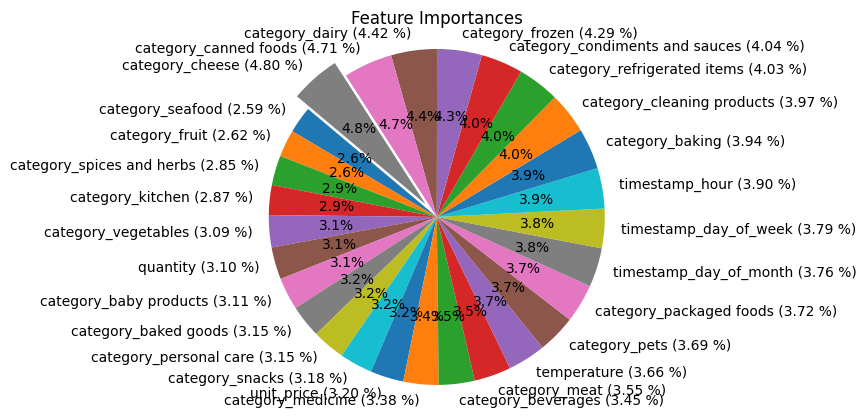

In [ ]:
features = [i.split("__")[0] for i in X.columns]

# Get feature importances from the model
importances = model.feature_importances_

# Normalize importances to percentages
normalized_importances = importances / np.sum(importances)

# Create a pie chart
fig, ax = plt.subplots()
plt.title('Feature Importances')

# Labels for the pie chart segments
labels = [f"{features[i]} ({normalized_importances[i]*100:.2f} %)" for i in indices]

# Explode the most important features for emphasis
explode = [0.1 if i == np.argmax(normalized_importances) else 0 for i in indices]

plt.pie(normalized_importances[indices], labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Insights from random forrest regressor.

we can clearly see from visualization that key factors that were important :


**unit price**

**temperature**

**hours of the day**

apart from that other columns especially category columns doesn't much signaficance to our data.

# Insights by using xgboost model

we can clearly see from visualization that key factors that were important:

**Category Chesse**

**Category Canned Foods**

**Category Diary**

**Category Frozen**

and the significance of other feature decreases as we go down.